<a href="https://colab.research.google.com/github/ChaaruVijay/DSPL-CourseWork/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [68]:
# Load the dataset
df = pd.read_csv('cleaned_train.csv')

In [69]:
# Select features and target variable
X = df[['luxury_sales', 'fresh_sales', 'dry_sales', 'outlet_city']]
y = df['cluster_category']

In [70]:
# Encode categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [71]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
# Split data into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [73]:
# Add Gaussian noise to training data for better generalization
noise_factor = 0.005  # Slightly reduced noise
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

In [74]:
# Define Optimized Neural Network Model
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),  # Increased dropout

    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),  # Increased dropout

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(len(label_encoder.classes_), activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
# Compile the model
optimizer = Adam(learning_rate=0.0003)  # Slightly reduced learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
# Callbacks: Early Stopping & Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)

In [77]:
# Train the model
history = model.fit(X_train_noisy, y_train, epochs=50, batch_size=256, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_scheduler])

Epoch 1/50
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.8915 - loss: 0.6407 - val_accuracy: 0.9947 - val_loss: nan - learning_rate: 3.0000e-04
Epoch 2/50
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9911 - loss: 0.1299 - val_accuracy: 0.9961 - val_loss: nan - learning_rate: 3.0000e-04
Epoch 3/50
1959/1964 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9932 - loss: 0.0485
Epoch 3: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9932 - loss: 0.0485 - val_accuracy: 0.9944 - val_loss: nan - learning_rate: 3.0000e-04
Epoch 4/50
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9954 - loss: 0.0285 - val_accuracy: 0.9970 - val_loss: nan - learning_rate: 9.0000e-05
Epoch 5/50
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9955 - loss: 0.0245 - val_accuracy: 0.9970 - val_loss: nan - learning_rate: 9.0000e-05
Epoch 6/50
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accu

In [78]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

3928/3928 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9945 - loss: nan
Test Loss: nan
Test Accuracy: 0.9947


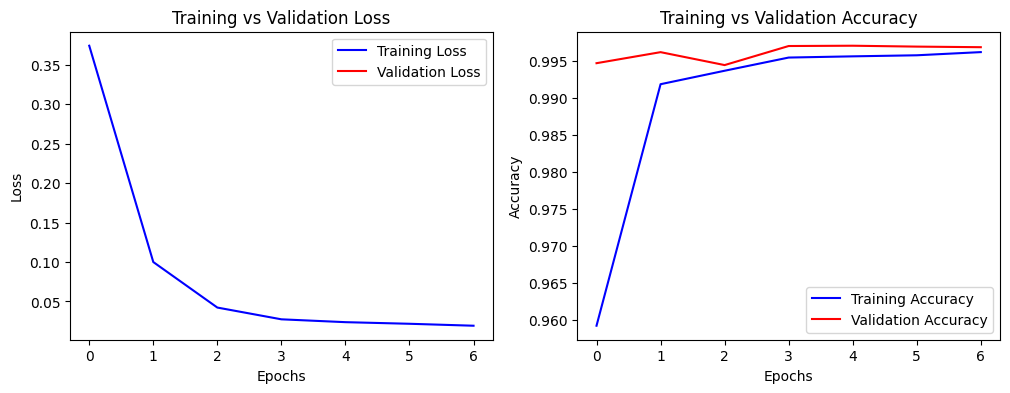

In [79]:
# Plot Training & Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [80]:
# Predict probabilities
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

3928/3928 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


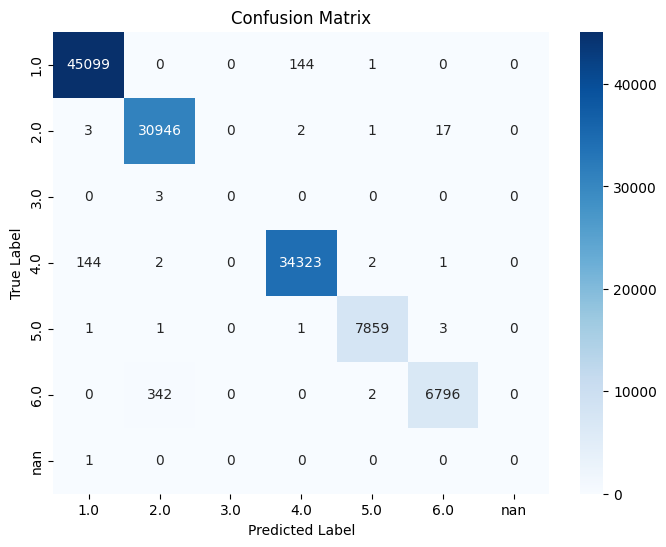

In [81]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [82]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(c) for c in label_encoder.classes_]))


Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     45244
         2.0       0.99      1.00      0.99     30969
         3.0       0.00      0.00      0.00         3
         4.0       1.00      1.00      1.00     34472
         5.0       1.00      1.00      1.00      7865
         6.0       1.00      0.95      0.97      7140
         nan       0.00      0.00      0.00         1

    accuracy                           0.99    125694
   macro avg       0.71      0.71      0.71    125694
weighted avg       0.99      0.99      0.99    125694



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [83]:
# Load cleaned test dataset
cleaned_test = pd.read_csv('cleaned_test.csv')

In [84]:
# Ensure 'outlet_city' is a string type
if 'outlet_city' in cleaned_test.columns:
    cleaned_test['outlet_city'] = cleaned_test['outlet_city'].astype(str)  # Convert to string if needed

In [85]:
# Apply the same encoding as in training
if 'outlet_city' in df.columns:  # Ensure training data had 'outlet_city'
    outlet_city_encoder = LabelEncoder()
    outlet_city_encoder.fit(df['outlet_city'])  # Fit on training data

In [86]:
# Create a mapping dictionary from training cities
outlet_city_mapping = dict(zip(outlet_city_encoder.classes_, outlet_city_encoder.transform(outlet_city_encoder.classes_)))

In [87]:
# Select the same features used in training
X_cleaned_test = cleaned_test[['luxury_sales', 'fresh_sales', 'dry_sales', 'outlet_city']]

In [88]:
# Standardize using the same scaler
X_cleaned_test_scaled = scaler.transform(X_cleaned_test)

ValueError: could not convert string to float: 'Batticaloa'

In [ ]:
# Predict cluster categories
cleaned_test_predictions = model.predict(X_cleaned_test_scaled)
cleaned_test['Predicted_Cluster_Category'] = label_encoder.inverse_transform(np.argmax(cleaned_test_predictions, axis=1))

In [ ]:
# Save predictions
cleaned_test.to_csv('cleaned_test_predictions.csv', index=False)

print("Predictions saved successfully!")